<a href="https://colab.research.google.com/github/BrianGrant-Data/BrianGrant-Data.github.io/blob/main/CSE350%5CUnit2Project_TargetedMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next steps

- one hot encode the data
- add the whole dataset to the model
- start pruning from that point
  - [do oversampleing?](https://colab.research.google.com/github/byui-cse/cse450-course/blob/master/notebooks/hint_imbalanced.ipynb)

#Module 02 — Targeted Marketing, Project
[Original Link](https://byui-cse.github.io/cse450-course/module-02/project.html)

[the data's dictionary](https://byui-cse.github.io/cse450-course/module-02/bank-dictionary.txt)

## Statement of Work

### Background
The Bank's stakeholders have asked that some issues be addressed with building an affective marketing campaign   

### Problem Statement
Make a machine learning model that will predict if a customer will subscribe to a term deposit with __ recall & __ accuracy.

- "*...the core task we're interested in is identifying those customers most likely to subscribe to a term deposit.*" ~ *Miguel Ferreira, Bank President*

Determine what key factors values have the highest impact on subscription sign ups.

- "*...find any actionable patterns in our results. Should we only call single people on Saturdays? Does it make sense to call students at all? Things like that.*" ~ *Francisco, VP of Marketing*
 
Determine how much contact leads to decreased subscription sign ups.
- "*does contacting people too frequently for these marketing campaigns have an adverse affect on the outcome?*" ~ *Miguel Ferreira, Bank President*


Make seperate models for when consumer confidence index is high and when it is low, and determine when to use each.
- "*We'll definitely want to know if it's better to use a particular model during different economic situations.*" ~ *Miguel Ferreira, Bank President*




### Customers, Sponsors, etc
- MIGUEL FERREIRA, BANK PRESIDENT
- FRANCISCO, VP OF MARKETING 



### In scope work
- Make at least two K nearest neighbors models
- Identify top factors that contribute to a positive y value.
- 5/14/21: [Persist the trained models to a file](https://scikit-learn.org/stable/modules/model_persistence.html) 
- 5/15/21: [Submit write up on Canvas](https://byui-cse.github.io/cse450-course/module-02/summary.docx)

### Out of scope work
- Gathering data
- Anything else?

### Prior Work
BEATRIZ, SENIOR DATA SCIENTIST
JOHNNY, THE DATA SCIENCE INTERN has:
- gathered the data dictionary
- gathered the bank dataset
- identified and labeled the target variable

Notes have been gathered on:
- feature scaling
- binning
- decision trees
- model persistence
- model ensembles, bagging, and boosting
- avoiding overfitting through pruning 
- [transforming features, MinMax Scaling a feature, Dealing with Dates, Using a decision tree, Imbalanced datasets](https://byui-cse.github.io/cse450-course/module-02/hints.html)

## Prepare Environment

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")

## Explore the Data

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df["cons.conf.idx"].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.nunique(dropna=False)

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

## Initial Thoughts
I'll want to see a set of barcharts for the columns with few unique categorical variables

The ones with a lot of unique categorical variables I'll consider grouping or turning into a numeric series.

The date columns will be a single plot over time colored or grouped by day of week.

## Clean the Data

### Step 1: Preprocess the Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df['subs'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
categorical = df.select_dtypes(exclude=[np.number]).columns # to be converted to numeric data
categorical 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
numeric = df.select_dtypes(include=[np.number]).columns # to be converted to numeric data
numeric 

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subs'],
      dtype='object')

In [ ]:
df_category = df.select_dtypes(exclude=[np.number]) # Categorical/non-numeric factors
df_numeric = df.select_dtypes(include=[np.number]) # Numeric factors

In [ ]:
df_category.nunique(dropna=False)

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [ ]:
df_numeric.nunique(dropna=False)

age                78
campaign           42
pdays              27
previous            8
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
subs                2
dtype: int64

#### 1.1 One Hot Encoding

In [ ]:
# one-hot encoding each column
df_cat_onehot = pd.get_dummies(df_category)

# dropping redundant columns
df_cat_onehot = df_cat_onehot.drop(columns = ["default_no", "loan_no", "y_yes", "y_no", "housing_no", "contact_telephone"])

df_cat_onehot.columns


Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='o

In [ ]:
df_onehot = pd.concat([df_numeric, df_cat_onehot], axis=1).reindex(df_numeric.index)
# df_onehot.info()

#### 1.3 Identify Key Features and Targets

I'd want to know:
- which of the categorical values are over represented in the population. 
- which of the categorical values have an over representation of subs
- what the distribution of the numeric data is.



<Figure size 432x288 with 0 Axes>

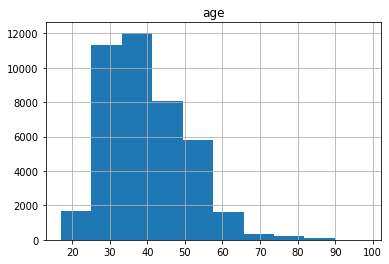

<Figure size 432x288 with 0 Axes>

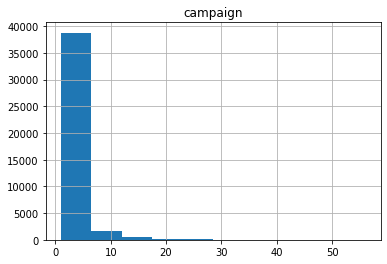

<Figure size 432x288 with 0 Axes>

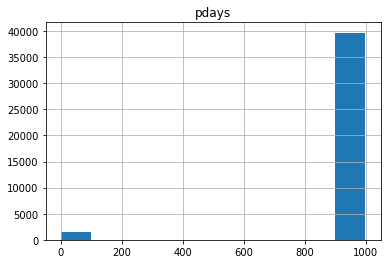

<Figure size 432x288 with 0 Axes>

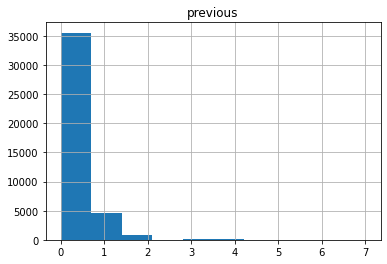

<Figure size 432x288 with 0 Axes>

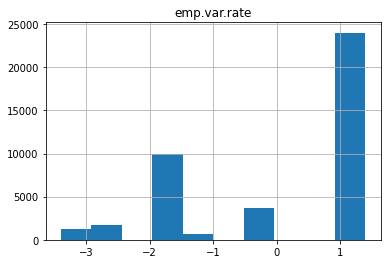

<Figure size 432x288 with 0 Axes>

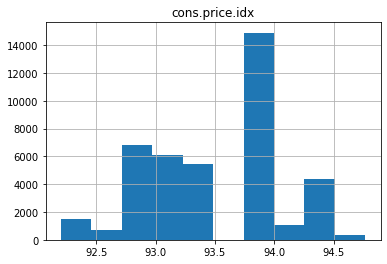

<Figure size 432x288 with 0 Axes>

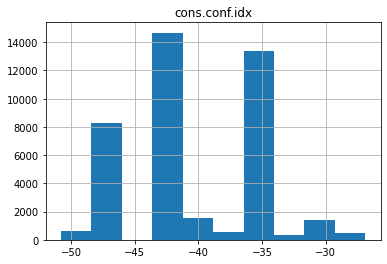

<Figure size 432x288 with 0 Axes>

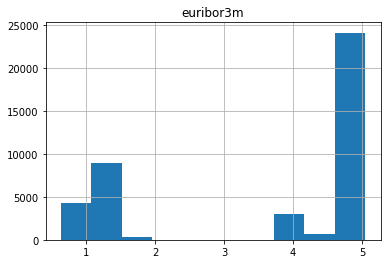

<Figure size 432x288 with 0 Axes>

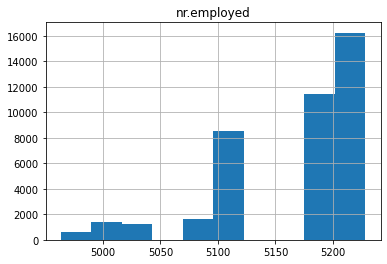

<Figure size 432x288 with 0 Axes>

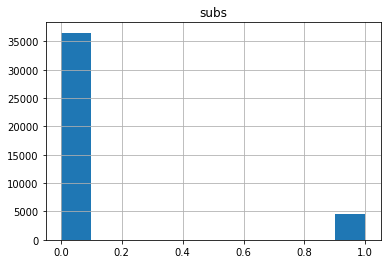

In [ ]:
# This is the distribution of the numeric data
for column in df_numeric:
    plt.figure()
    df.hist([column])

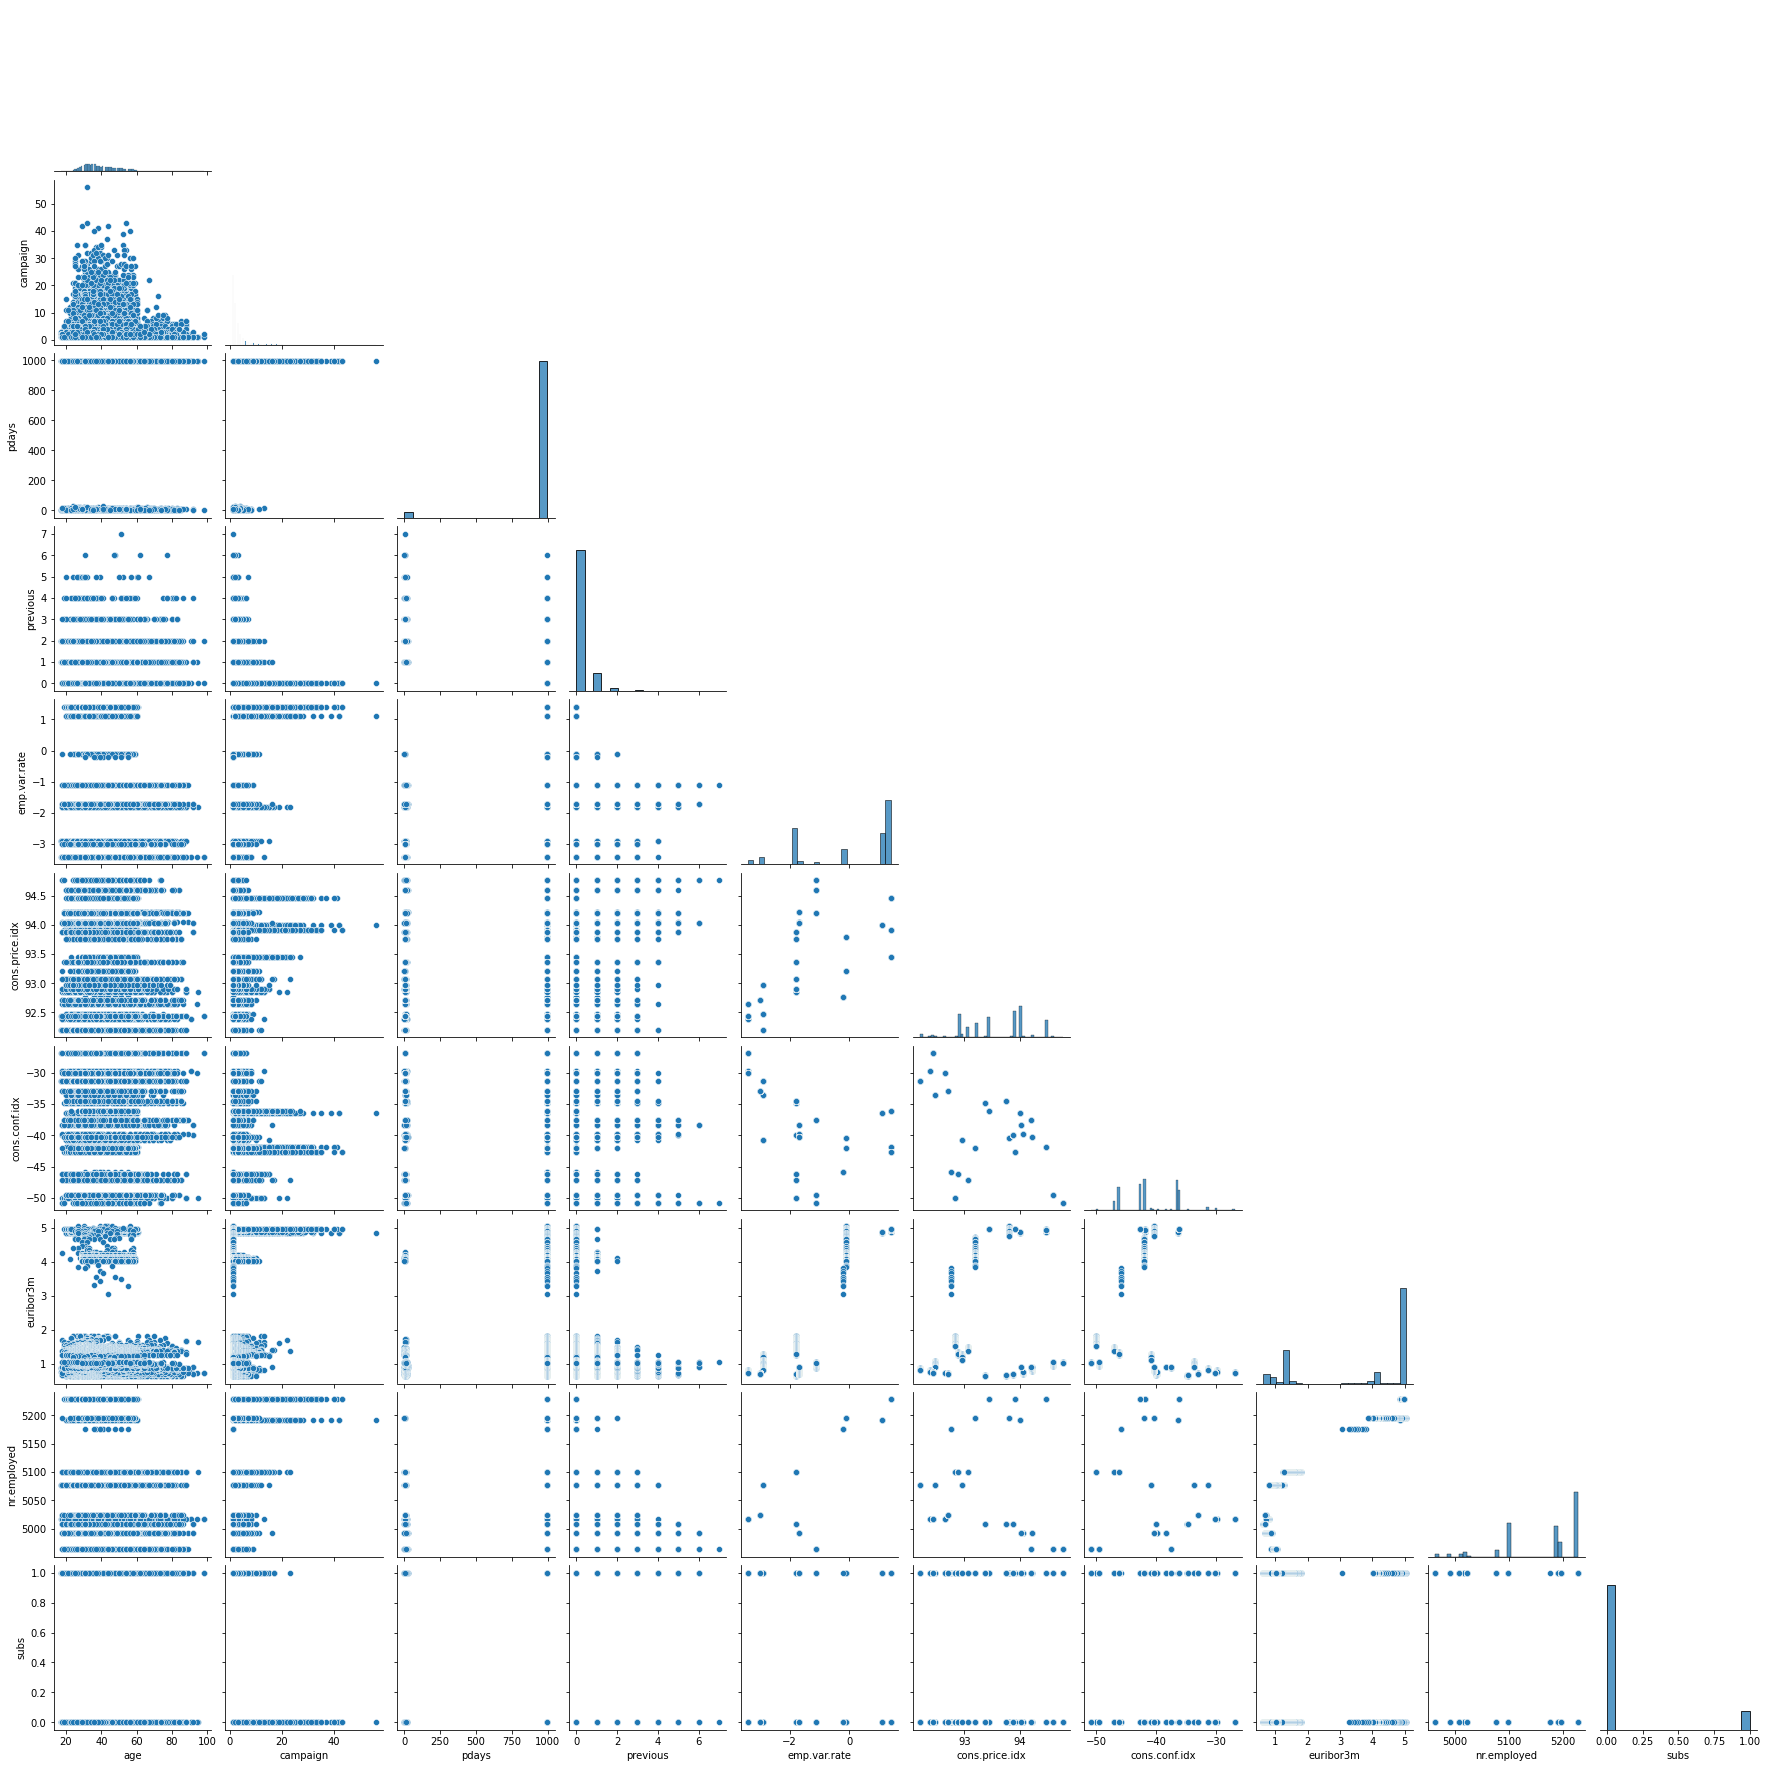

In [ ]:
sns.pairplot(df_numeric, corner=True)

### Step 2: Partition the Data into Features and Targets

In [ ]:
X = df_onehot.drop(columns=["subs"])
X.head

<bound method NDFrame.head of        age  campaign  ...  poutcome_nonexistent  poutcome_success
0       56         1  ...                     1                 0
1       57         1  ...                     1                 0
2       37         1  ...                     1                 0
3       40         1  ...                     1                 0
4       56         1  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73         1  ...                     1                 0
41184   46         1  ...                     1                 0
41185   56         2  ...                     1                 0
41186   44         1  ...                     1                 0
41187   74         3  ...                     0                 0

[41188 rows x 58 columns]>

In [ ]:
y = df_onehot['subs']
y.head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: subs, Length: 41188, dtype: int64>

### Step 3. Split the data into training and test sets.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1.4,93.918,-42.7,4.960,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,-1.8,92.893,-46.2,1.244,5099.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,-1.8,92.893,-46.2,1.354,5099.1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
17914,43,5,999,0,1.4,93.918,-42.7,4.961,5228.1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3315,39,2,999,0,1.1,93.994,-36.4,4.860,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
y_train.head()

12556    0
35451    0
30592    0
17914    0
3315     0
Name: subs, dtype: int64

#### 2.1 Random Oversampling 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
X_train_balance, y_train_balance = ro.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Build and Train a Model

### Step 4. Create and configure the model

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
model = DecisionTreeClassifier()

### Step 5: Train the model

In [ ]:
model.fit(X_train_balance, y_train_balance)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Make Predictions and Evaluate the Model

### Step 6: Make Predictions on Test Data


In [ ]:
y_predict = model.predict(X_test)
print(y_predict, "\n \n" , model.predict_proba(X_test))

[0 0 0 ... 0 0 1] 
 
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


## Model Evaluation

In [ ]:
(y_predict == y_test).unique()

array([ True, False])

In [ ]:
(y_predict == y_test).describe()

count     8238
unique       2
top       True
freq      6876
Name: subs, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, recall_score, precision_score

In [ ]:
accuracy_score(y_test, y_predict)

0.8346686088856519

In [ ]:
confusion_matrix(y_test, y_predict)

array([[6581,  722],
       [ 640,  295]])

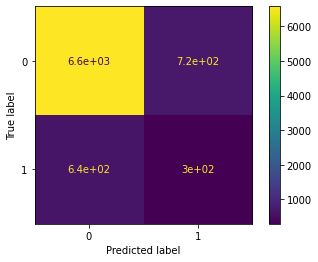

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
recall_score(y_test, y_predict) 

0.3155080213903743

This is the important result. The lower the recall, the less people we correctly identified who subscribed to the service and the more people we thought wouldn't who actually did.

For this result, out of all of the people we thought would sign up and did, divided by the same plus those who we thought wouldn't signup but did, is about 18 out of every 100. To be precise, that was 166 out of the 935 who signed up that we correctly identified. 

Onehot Encoding brought the recall up from .124 to .343.
Random oversampling brought the recall down from .343 to .316

In [ ]:
precision_score(y_test, y_predict)

0.2915422885572139

## Model Pruning

## Q3:  Determine how much contact leads to decreased subscription sign ups.
- "*does contacting people too frequently for these marketing campaigns have an adverse affect on the outcome?*" ~ *Miguel Ferreira, Bank President*


In [ ]:
df_onehot["campaign"].plot(x="subs", y=count())

NameError: ignored

## Conclusion

### Model Result Visualization

In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(20, 20))
# tree.plot_tree(model, fontsize=10, feature_names=X.columns)
# plt.show()

# Jordan's work


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


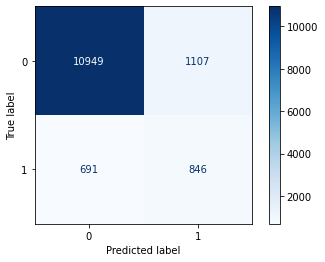

In [ ]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
clean = pd.get_dummies(campaign)
clean = clean.drop(columns=["contact_cellular","y_no","housing_no"])
# clean.head()

from sklearn.model_selection import train_test_split
X = clean[['age','campaign','euribor3m','nr.employed',"cons.conf.idx"]]
y = clean['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
X_new, y_new = ro.fit_resample(X_train, y_train)
# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate survivors
new_y = pd.DataFrame(y_new)
# new_y.value_counts()

from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_new, y_new)
test_predictions = clf.predict(X_test)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues',values_format='')

In [ ]:
recall_score(y_test, test_predictions) 

0.5504229017566689

In [ ]:
accuracy_score(y_test, test_predictions)

0.8677260354594276

In [ ]:
from joblib import dump, load
dump(clf, 'clf_bankmarketing.joblib')

['clf_bankmarketing.joblib']

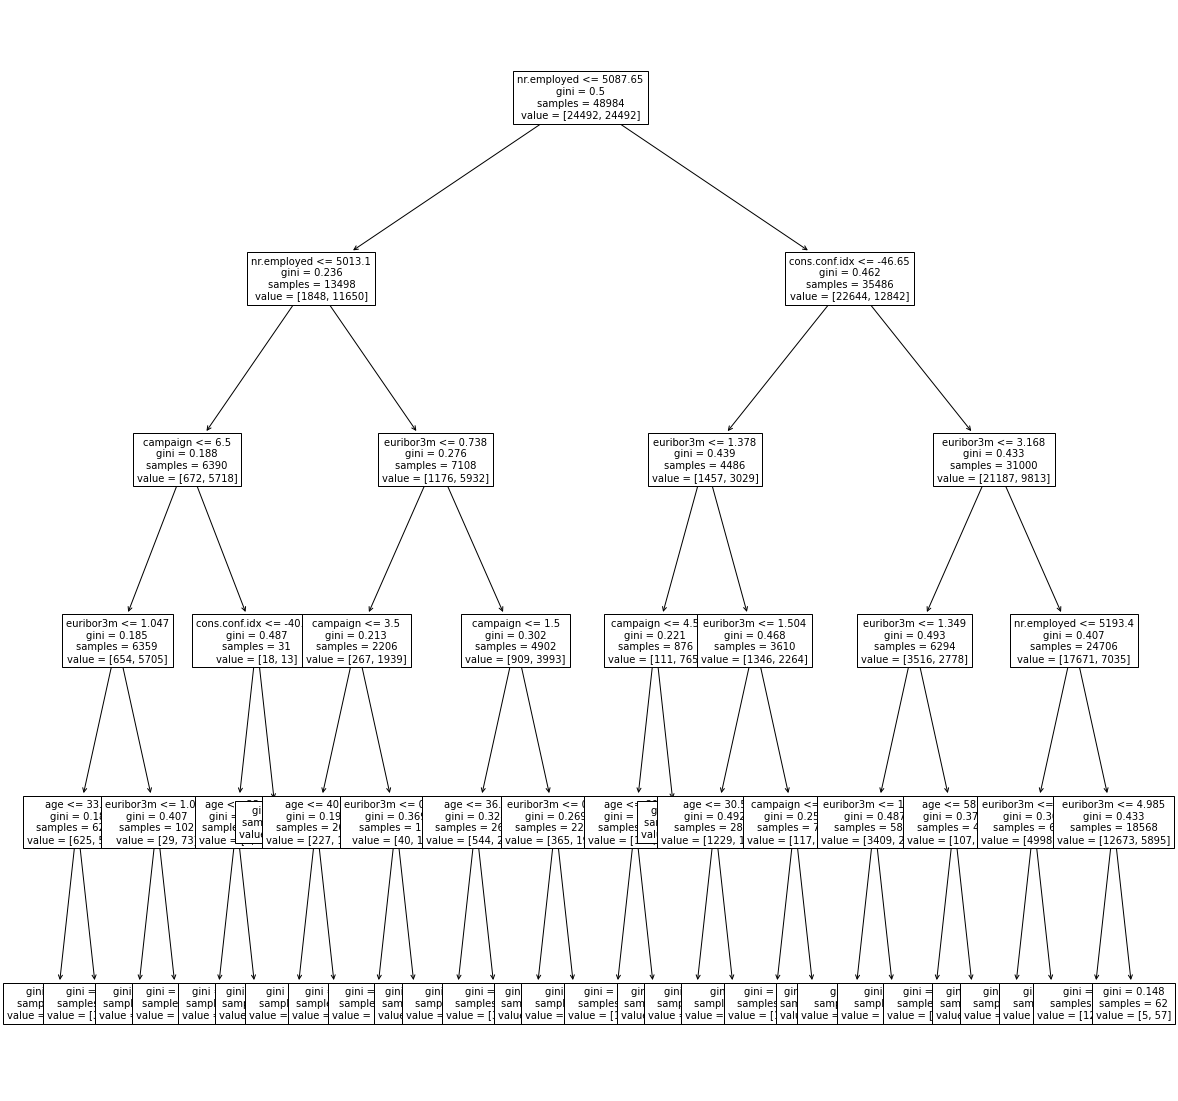

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()